In [112]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print("OpenCV version:", cv2.__version__)

OpenCV version: 4.10.0


이미지 로드 성공!


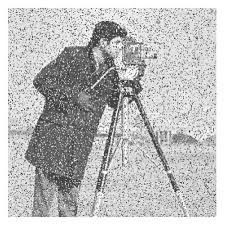

In [113]:
#!wget -O gray_image.jpg 'https://blog.aspose.cloud/ko/imaging/grayscale-image-in-java/images/grayscale.jpg' -q
#!wget -O gray_image.jpg 'https://www.mathworks.com/help/examples/images/win64/DenoiseColorImageUsingNonLocalMeansFilterExample_01.png' -q
!wget -O gray_image.jpg 'https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQjWaAtzfOHiCdN6YPzidV2ye8QLF4NWQbSsI_DqDBncI-cwFmS' -q
image_path = 'gray_image.jpg'
image = cv2.imread(image_path)
if image is None:
    print("이미지를 불러오지 못했습니다. 경로를 확인하세요.")
else:
    print('이미지 로드 성공!')
    cv2_imshow(image)

Cross-correlation result:


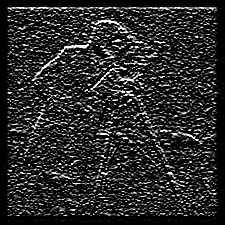

Convolution result (kernel flipped):


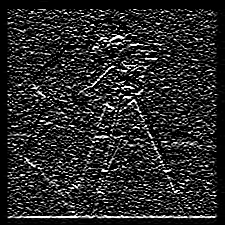

In [114]:
if image is not None:
    gray_conv = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel_edge = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    corr_result = cv2.filter2D(gray_conv, -1, kernel_edge)

    conv_kernel = np.flip(kernel_edge)
    conv_result = cv2.filter2D(gray_conv, -1, conv_kernel)

    print('Cross-correlation result:')
    cv2_imshow(corr_result)
    print("Convolution result (kernel flipped):")
    cv2_imshow(conv_result)
else:
    print("이미지가 None입니다. 확인 후 다시 시도하세요.")

Custom Average Filter (3x3) using filter2D:


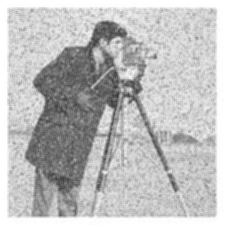

In [115]:
if image is not None:
    kernel_size = 3
    kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / (kernel_size**2)
    avg_custom = cv2.filter2D(image, -1, kernel)
    print('Custom Average Filter (3x3) using filter2D:')
    cv2_imshow(avg_custom)

Average Blur (5x5):


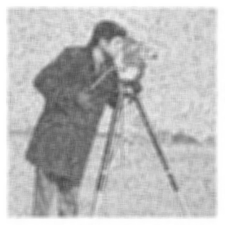

Gaussian Blur (5x5):


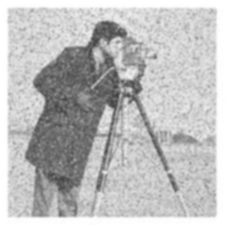

Median Blur (5):


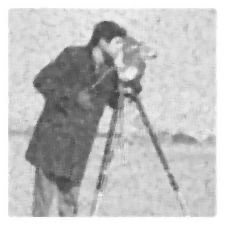

In [116]:
if image is not None:
  blur_ = cv2.blur(image, (5, 5))
  gauss_ = cv2.GaussianBlur(image, (5, 5), 0)
  median_ = cv2.medianBlur(image, 5)

  print('Average Blur (5x5):')
  cv2_imshow(blur_)
  print('Gaussian Blur (5x5):')
  cv2_imshow(gauss_)
  print('Median Blur (5):')
  cv2_imshow(median_)

Sobel X


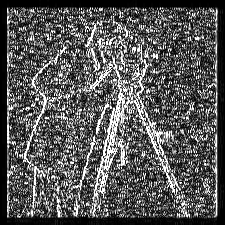

Sobel Y


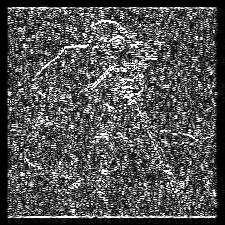

Sobel Combined


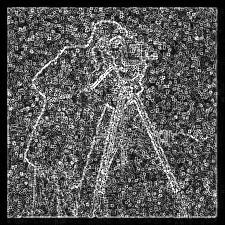

In [117]:
if image is not None:
  gray_sobel = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  sobelx = cv2.Sobel(gray_sobel, cv2.CV_64F, 1, 0, ksize=3)
  sobely = cv2.Sobel(gray_sobel, cv2.CV_64F, 0, 1, ksize=3)
  sobelx = cv2.convertScaleAbs(sobelx)
  sobely = cv2.convertScaleAbs(sobely)
  sobel_combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

  print('Sobel X')
  cv2_imshow(sobelx)
  print('Sobel Y')
  cv2_imshow(sobely)
  print('Sobel Combined')
  cv2_imshow(sobel_combined)

[Original Binary]


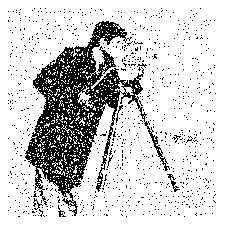

[Erosion]


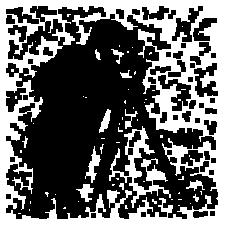

[Dilation]


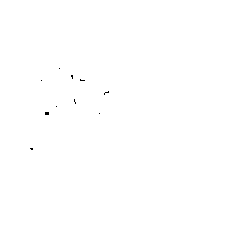

[Opening]


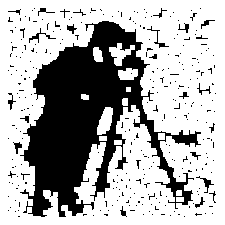

[Closing]


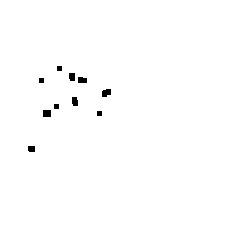

In [118]:
if image is not None:
  gray_morph = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray_morph, 128, 255, cv2.THRESH_BINARY)
  kernel_3 = np.ones((5, 5), np.uint8)

  eroded = cv2.erode(thresh, kernel_3, iterations=1)
  dilated = cv2.dilate(thresh, kernel_3, iterations=1)
  opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_3)
  closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel_3)

  print('[Original Binary]')
  cv2_imshow(thresh)
  print('[Erosion]')
  cv2_imshow(eroded)
  print('[Dilation]')
  cv2_imshow(dilated)
  print('[Opening]')
  cv2_imshow(opened)
  print('[Closing]')
  cv2_imshow(closed)

Bilateral Filter(d=9, sigmaColor=75, sigmaSpace=75)


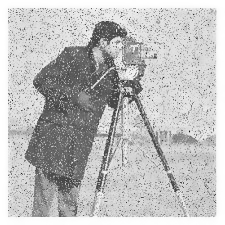

Non-Local Means Denoising(h=10, hColor=10)


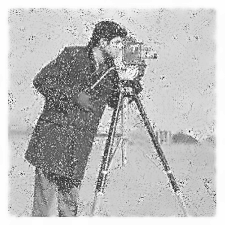

In [119]:
if image is not None:
  bilateral_res = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
  print('Bilateral Filter(d=9, sigmaColor=75, sigmaSpace=75)')
  cv2_imshow(bilateral_res)

  denoised_res = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
  print('Non-Local Means Denoising(h=10, hColor=10)')
  cv2_imshow(denoised_res)

Unsharp Masking (alpha=1.5)


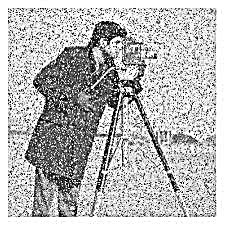

In [120]:
if image is not None:
  blur_for_unsharp = cv2.GaussianBlur(image, (9, 9), 10)
  alpha = 1.5
  unsharp = cv2.addWeighted(image, 1+alpha, blur_for_unsharp, -alpha, 0)

  print('Unsharp Masking (alpha=1.5)')
  cv2_imshow(unsharp)

Canny (threshold1=50, threshold2=150)


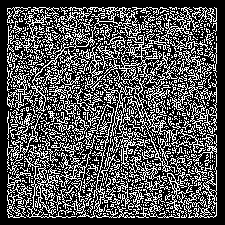

Canny (threshold1=100, threshold2=200)


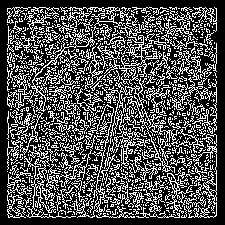

Canny (threshold1=150, threshold2=250)


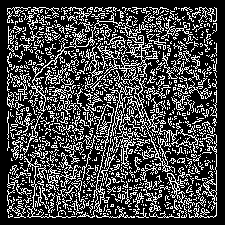

Laplacian (ksize=1)


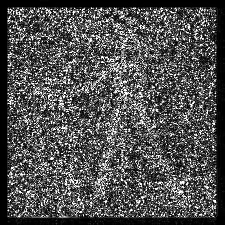

Laplacian (ksize=3)


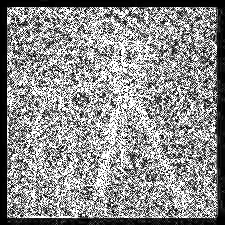

Laplacian (ksize=5)


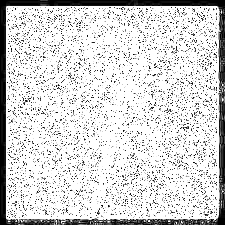

In [121]:
if image is not None:
  gray_edges = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  for (t1,t2) in [(50, 150), (100, 200), (150, 250)]:
    canny_res = cv2.Canny(gray_edges, t1, t2)
    print(f'Canny (threshold1={t1}, threshold2={t2})')
    cv2_imshow(canny_res)

  for ksize_ in [1,3,5]:
    lap = cv2.Laplacian(gray_edges, cv2.CV_64F, ksize=ksize_)
    lap = cv2.convertScaleAbs(lap)
    print(f'Laplacian (ksize={ksize_})')
    cv2_imshow(lap)

Gabor filter (theta=0.00)


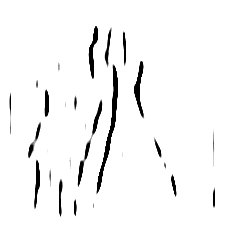

Gabor filter (theta=0.79)


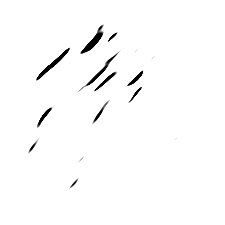

Gabor filter (theta=1.57)


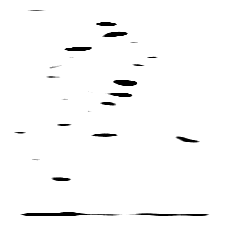

Gabor filter (theta=2.36)


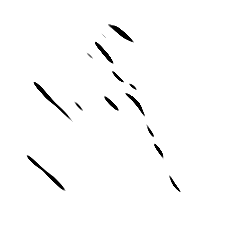

In [122]:
def apply_gabor_filter(img, ksize, sigma, theta, lambd, gamma, psi=0):
  gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  filtered = cv2.filter2D(gray_img, cv2.CV_8UC3, gabor_kernel)
  return filtered

if image is not None:
  for theta_ in [0, np.pi/4, np.pi/2, 3*np.pi/4]:
    gabor_res = apply_gabor_filter(image, 31, 4.0, theta_, 10.0, 0.5, 0)
    print(f'Gabor filter (theta={theta_:.2f})')
    cv2_imshow(gabor_res)